In [3]:
import cv2
import tensorflow as tf
from tensorflow.keras import datasets, layers,models
import numpy as np
import matplotlib.pyplot as plt


In [5]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
#We convert to 1d array
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
y_test=y_test.reshape(-1,)
y_test.shape

(10000,)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
def plot(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

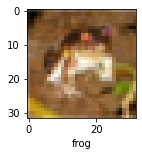

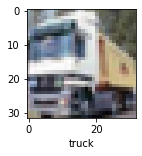

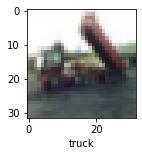

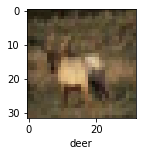

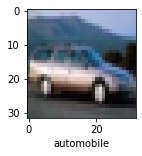

In [14]:
for i in range(5):
  plot(X_train,y_train,i)

In [15]:
X_train=X_train/255.0
X_test=X_test/255.0

In [16]:
#Building ANN
model_ann=models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000,activation='relu'),
        layers.Dense(2000,activation='relu'),
        layers.Dense(10,activation='softmax')
])
model_ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_ann.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 161s 103ms/step - loss: 1.8085 - accuracy: 0.3564
Epoch 2/10
1563/1563 [==============================] - 201s 129ms/step - loss: 1.6182 - accuracy: 0.4299
Epoch 3/10
1563/1563 [==============================] - 208s 133ms/step - loss: 1.5360 - accuracy: 0.4577
Epoch 4/10
1563/1563 [==============================] - 179s 114ms/step - loss: 1.4776 - accuracy: 0.4784
Epoch 5/10
1563/1563 [==============================] - 149s 95ms/step - loss: 1.4287 - accuracy: 0.4984
Epoch 6/10
1563/1563 [==============================] - 164s 105ms/step - loss: 1.3843 - accuracy: 0.5156
Epoch 7/10
1563/1563 [==============================] - 147s 94ms/step - loss: 1.3441 - accuracy: 0.5275
Epoch 8/10
1563/1563 [==============================] - 136s 87ms/step - loss: 1.3110 - accuracy: 0.5422
Epoch 9/10
1563/1563 [==============================] - 134s 86ms/step - loss: 1.2770 - accuracy: 0.5494
Epoch 10/10
1563/1563 [===========================

In [17]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=model_ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print("Classification_report : ",classification_report(y_test,y_pred_classes))


Classification_report :                precision    recall  f1-score   support

           0       0.48      0.65      0.55      1000
           1       0.66      0.62      0.64      1000
           2       0.38      0.46      0.41      1000
           3       0.44      0.24      0.31      1000
           4       0.46      0.44      0.45      1000
           5       0.47      0.39      0.42      1000
           6       0.59      0.53      0.56      1000
           7       0.72      0.45      0.56      1000
           8       0.59      0.68      0.63      1000
           9       0.48      0.71      0.57      1000

    accuracy                           0.52     10000
   macro avg       0.53      0.52      0.51     10000
weighted avg       0.53      0.52      0.51     10000



In [18]:
#Building CNN
model_cnn=models.Sequential([
          layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
          layers.MaxPooling2D((2,2)),
          layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
          layers.MaxPooling2D((2,2)),

          layers.Flatten(),
          layers.Dense(64,activation='relu'),
          layers.Dense(10,activation='softmax')
])


model_cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])



In [20]:
model_cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.6129 - accuracy: 0.7851
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.5855 - accuracy: 0.7952
Epoch 3/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.5618 - accuracy: 0.8052
Epoch 4/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.5364 - accuracy: 0.8118
Epoch 5/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.5120 - accuracy: 0.8199
Epoch 6/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.4935 - accuracy: 0.8253
Epoch 7/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.4719 - accuracy: 0.8328
Epoch 8/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.4518 - accuracy: 0.8393
Epoch 9/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.4351 - accuracy: 0.8457
Epoch 10/10
1563/1563 [==============================] - 62s 40m

In [21]:
model_cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 13ms/step - loss: 1.1371 - accuracy: 0.6901


[1.1370826959609985, 0.6901000142097473]

# **DATA AUGMENTATION**

In [2]:
import tensorflow as tf
import PIL
import numpy as np

from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import os
import cv2


In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flowers',origin=dataset_url,cache_dir='/content/drive/MyDrive/dl projects',untar=True)
#Cache dir has the location of the file. 
#untar= Unzip the file 


228827136/228813984 [==============================] - 3s 0us/step


In [6]:
data_dir

'/content/drive/MyDrive/dl projects/datasets/flowers'

In [15]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('/content/drive/MyDrive/dl projects/datasets/flowers')

In [16]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/content/drive/MyDrive/dl projects/datasets/flowers/roses/14810868100_87eb739f26_m.jpg'),
 PosixPath('/content/drive/MyDrive/dl projects/datasets/flowers/roses/1446090416_f0cad5fde4.jpg'),
 PosixPath('/content/drive/MyDrive/dl projects/datasets/flowers/roses/15319767030_e6c5602a77_m.jpg'),
 PosixPath('/content/drive/MyDrive/dl projects/datasets/flowers/roses/15032112248_30c5284e54_n.jpg'),
 PosixPath('/content/drive/MyDrive/dl projects/datasets/flowers/roses/7211616670_2d49ecb3a5_m.jpg')]

In [17]:
image_count=len(list(data_dir.glob('*/*')))
print(image_count)

3670


In [18]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('/content/drive/MyDrive/dl projects/datasets/flowers/roses/14810868100_87eb739f26_m.jpg'),
 PosixPath('/content/drive/MyDrive/dl projects/datasets/flowers/roses/1446090416_f0cad5fde4.jpg'),
 PosixPath('/content/drive/MyDrive/dl projects/datasets/flowers/roses/15319767030_e6c5602a77_m.jpg'),
 PosixPath('/content/drive/MyDrive/dl projects/datasets/flowers/roses/15032112248_30c5284e54_n.jpg'),
 PosixPath('/content/drive/MyDrive/dl projects/datasets/flowers/roses/7211616670_2d49ecb3a5_m.jpg')]

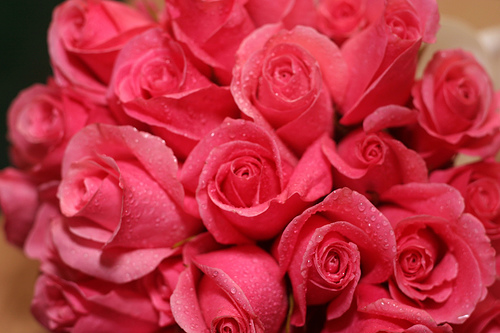

In [21]:
#To show images 

PIL.Image.open(str(roses[1]))

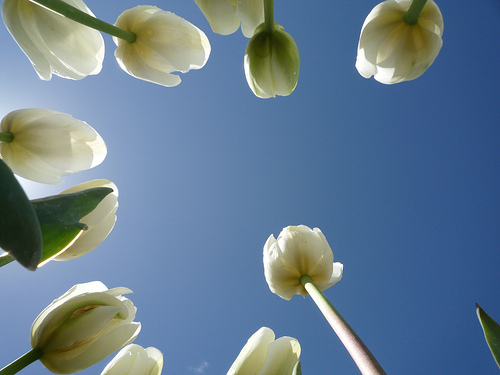

In [25]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[1]))

In [26]:
flower_image_dir={
    'roses':list(data_dir.glob('roses/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'tulips':list(data_dir.glob('tulips/*')),

}

In [28]:
flower_labels={
    'roses':0,
    'dandelion':1,
    'sunflowers':2,
    'daisy':3,
    'tulips':4,

}

In [30]:
flower_image_dir['roses'][:5]

[PosixPath('/content/drive/MyDrive/dl projects/datasets/flowers/roses/14810868100_87eb739f26_m.jpg'),
 PosixPath('/content/drive/MyDrive/dl projects/datasets/flowers/roses/1446090416_f0cad5fde4.jpg'),
 PosixPath('/content/drive/MyDrive/dl projects/datasets/flowers/roses/15319767030_e6c5602a77_m.jpg'),
 PosixPath('/content/drive/MyDrive/dl projects/datasets/flowers/roses/15032112248_30c5284e54_n.jpg'),
 PosixPath('/content/drive/MyDrive/dl projects/datasets/flowers/roses/7211616670_2d49ecb3a5_m.jpg')]

In [32]:
str(flower_image_dir['roses'][0])

'/content/drive/MyDrive/dl projects/datasets/flowers/roses/14810868100_87eb739f26_m.jpg'

In [40]:
img=cv2.imread(str(flower_image_dir['roses'][0]))
img.shape

(240, 178, 3)

In [41]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [42]:
X, y = [], []

for flower_name, images in flower_image_dir.items():
    print(flower_name)
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flower_labels[flower_name])

roses
dandelion
sunflowers
daisy
tulips


In [ ]:
flower_image_dir.items()

In [47]:
X=np.array(X)
Y=np.array(y)



In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=0)


In [52]:
X_train_scaled=X_train/255.0
X_test_scaled=X_test/255.0

In [54]:
from tensorflow import keras
model=keras.Sequential([
        layers.Conv2D(16,3,padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64,3,padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(45,3,padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),

        layers.Dense(128,activation='relu'),
        layers.Dense(5)
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
86/86 [==============================] - 134s 2s/step - loss: 1.7890 - accuracy: 0.2442
Epoch 2/10
86/86 [==============================] - 127s 1s/step - loss: 1.6094 - accuracy: 0.2435
Epoch 3/10
86/86 [==============================] - 111s 1s/step - loss: 1.6094 - accuracy: 0.2435
Epoch 4/10
86/86 [==============================] - 111s 1s/step - loss: 1.6094 - accuracy: 0.2435
Epoch 5/10
86/86 [==============================] - 112s 1s/step - loss: 1.6094 - accuracy: 0.2435
Epoch 6/10
86/86 [==============================] - 111s 1s/step - loss: 1.6094 - accuracy: 0.2435
Epoch 7/10
86/86 [==============================] - 120s 1s/step - loss: 1.6094 - accuracy: 0.2435
Epoch 8/10
86/86 [==============================] - 130s 2s/step - loss: 1.6094 - accuracy: 0.2435
Epoch 9/10
86/86 [==============================] - 111s 1s/step - loss: 1.6094 - accuracy: 0.2435
Epoch 10/10
86/86 [==============================] - 111s 1s/step - loss: 1.6094 - accuracy: 0.2435


In [ ]:
#Data Aug

data_aug=keras.Sequential([
      layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(180,180,3)),
      layers.experimental.preprocessing.RandomRotation(0.1),
      layers.experimental.preprocessing.RandomZoom(0.1),
      
])

In [ ]:
model1=keras.Sequential([
                         data_aug,
                         layers.Conv2D(32,3,padding='same',activation='relu'),
                         layers.MaxPooling2D(),
                         layers.Flatten(),
                         layers.Dropout(0.2)
])